## Observations and Insights 

In [1]:
#1.Percentages of male and female mice used for the study are almost same.
#2.Tumor volume decreases significantly  with time for mice treated with capomulin
#3.There is a positive correlation between mouse weight and average tumor volume.
#4.Final Tumor Volumes for Capomulin and Ramicane regimens are lower than Infubinol and Ceftamin regimens.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df=combined_df[combined_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicated_mouse_ID=duplicate_df["Mouse ID"].unique()
duplicated_mouse_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df=combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="last").reset_index(drop=True)
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
combined_df["Mouse ID"].nunique()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_group=combined_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume=regimen_group["Tumor Volume (mm3)"].mean()
mean_tumor_volume.rename("Mean",inplace=True)
median_tumor_volume=regimen_group["Tumor Volume (mm3)"].median()
median_tumor_volume.rename("Median",inplace=True)                         
variance_tumor_volume=regimen_group["Tumor Volume (mm3)"].var()
variance_tumor_volume.rename("Variance",inplace=True)
sdv_tumor_volume=regimen_group["Tumor Volume (mm3)"].std()
sdv_tumor_volume.rename("Standard Deviation",inplace=True)


sem_tumor_volume=regimen_group["Tumor Volume (mm3)"].sem()
sem_tumor_volume.rename("SEM",inplace=True)

# Assemble the resulting series into a single summary dataframe.

tumor_df=pd.concat([mean_tumor_volume,median_tumor_volume,variance_tumor_volume,sdv_tumor_volume,sem_tumor_volume],axis=1)
tumor_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_data=regimen_group["Timepoint"].count()
bar_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

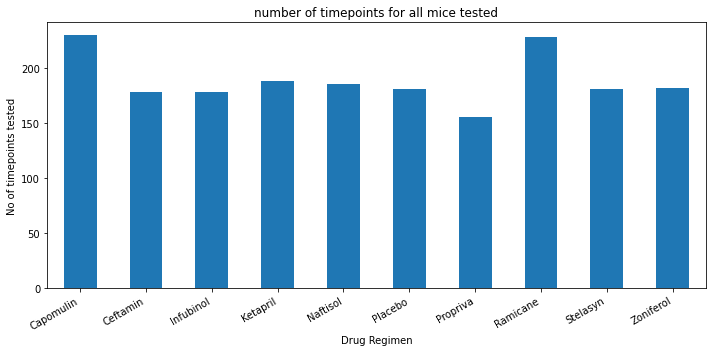

In [11]:
bar_plot1=bar_data.plot(kind="bar",figsize=(10,5),width=.5)
bar_plot1.set_ylabel("No of timepoints tested")
bar_plot1.set_title("number of timepoints for all mice tested")
plt.xticks(rotation=30,ha="right")
plt.tight_layout()
plt.show()

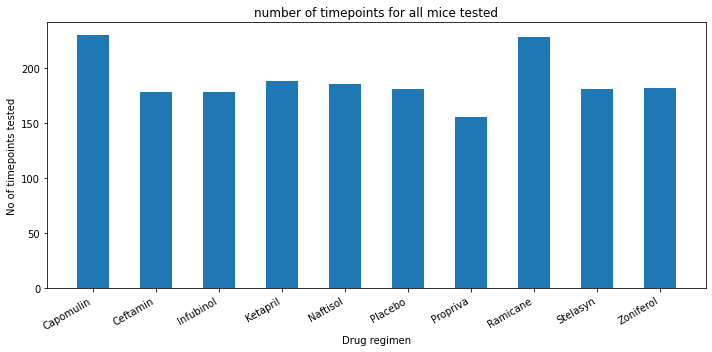

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_data=np.arange(len(bar_data))
tick_labels=bar_data.keys()

plt.figure(figsize=(10,5))
plt.bar(x_data,bar_data,width=.5)
plt.xticks(ticks=x_data,labels=tick_labels,rotation=30,ha="right")

plt.xlabel("Drug regimen")
plt.ylabel("No of timepoints tested")
plt.title("number of timepoints for all mice tested")

plt.tight_layout()
plt.show()

Male      125
Female    124
Name: Sex, dtype: int64


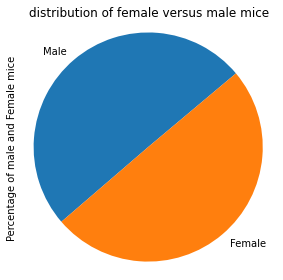

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df=combined_df[["Mouse ID","Sex"]]
gender_df=gender_df.drop_duplicates()
gender_count=gender_df["Sex"].value_counts()

print(gender_count)

pie_plot=gender_count.plot(kind="pie",startangle=40,figsize=(4,4))
pie_plot.set_ylabel("Percentage of male and Female mice")
pie_plot.set_title("distribution of female versus male mice")

plt.tight_layout()
plt.axis("equal")
plt.show()

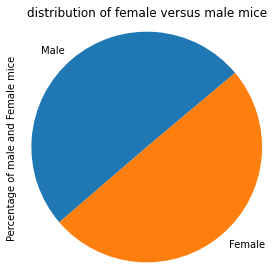

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

label=gender_count.keys()
plt.figure(figsize=(4,4))
plt.pie(gender_count,labels=label,startangle=40)
plt.ylabel("Percentage of male and Female mice")
plt.title("distribution of female versus male mice")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

tumor_vol_df=combined_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
tumor_vol_df.sort_values(by=["Mouse ID","Timepoint"]).reset_index(drop=True)
final_tumor_vol_df=tumor_vol_df.drop_duplicates(subset=["Mouse ID"],keep="last")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df=pd.merge(combined_df,final_tumor_vol_df,on=["Mouse ID","Timepoint"])
merged_df.drop("Tumor Volume (mm3)_y",axis=1,inplace=True)
merged_df.rename(columns={"Tumor Volume (mm3)_x":"final tumor volume"},inplace=True)

treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_data=merged_df[merged_df["Drug Regimen"].isin(treatments)]
tumor_data=tumor_data.sort_values(by="Drug Regimen")

tumor_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,final tumor volume,Metastatic Sites
32,j246,Capomulin,Female,21,21,35,38.753265,1
36,v923,Capomulin,Female,19,21,45,40.658124,2
35,w150,Capomulin,Male,23,23,10,39.952347,0
34,j119,Capomulin,Female,7,23,45,38.125164,1
39,l509,Capomulin,Male,17,21,45,41.483008,3
...,...,...,...,...,...,...,...,...
46,r921,Ramicane,Female,5,25,30,43.419381,1
47,w678,Ramicane,Female,5,24,5,43.166373,0
48,y449,Ramicane,Male,19,24,15,44.183451,0
23,r811,Ramicane,Male,9,19,45,37.225650,1


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers
    # Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset 
    # Determine outliers using upper and lower bounds
    
for treatment in treatments:
    
    filt=tumor_data["Drug Regimen"]==treatment
    final_tumor_vol_data=tumor_data.loc[filt,"final tumor volume"]

    quartiles=final_tumor_vol_data.quantile([.25,.5,.75])
    upperq=quartiles[.75]
    lowerq=quartiles[.25]
    iqr=upperq-lowerq
    upper_bound=upperq+(1.5*iqr)
    lower_bound=lowerq-(1.5*iqr)
    
    outlier=[data for data in final_tumor_vol_data if (data>upper_bound)or(data<lower_bound)]
    
    print(f"for drug regimen:{treatment}, upper_bound={upper_bound},lower_bound={lower_bound},iqr={iqr}")
    print(f"for drug regimen:{treatment}, number of ourliers are {len(outlier)}")


for drug regimen:Capomulin, upper_bound=51.83201549,lower_bound=20.70456164999999,iqr=7.781863460000004
for drug regimen:Capomulin, number of ourliers are 0
for drug regimen:Ramicane, upper_bound=54.30681135,lower_bound=17.912664470000003,iqr=9.098536719999998
for drug regimen:Ramicane, number of ourliers are 0
for drug regimen:Infubinol, upper_bound=82.74144559000001,lower_bound=36.83290494999999,iqr=11.477135160000003
for drug regimen:Infubinol, number of ourliers are 1
for drug regimen:Ceftamin, upper_bound=87.66645829999999,lower_bound=25.355449580000002,iqr=15.577752179999997
for drug regimen:Ceftamin, number of ourliers are 0


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

treatment_data=tumor_data[["Drug Regimen","final tumor volume"]]

plt.figure(figsize=(10,10))
treatment_data.boxplot(column="final tumor volume",by="Drug Regimen")
plt.title("Boxplot for final tumor volume for each drug regiment")
plt.ylabel("Final Tumor Volume")
plt.tight_layout()
plt.show()

## Line and Scatter Plots

['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557', 'r157']


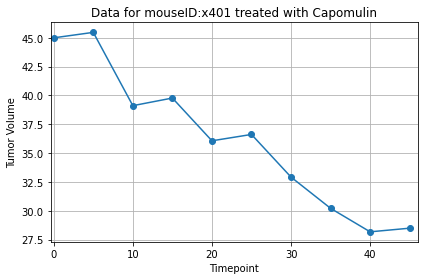

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
filt=merged_df["Drug Regimen"]=="Capomulin"
Capomulin_mouseID=merged_df.loc[filt,"Mouse ID"]
print(list(Capomulin_mouseID))

mouse_id="x401"

filt=combined_df["Mouse ID"]==mouse_id
mouse_data=combined_df.loc[filt,:]

x_data=[x for x in mouse_data["Timepoint"]]

plt.plot(x_data,mouse_data["Tumor Volume (mm3)"],marker="o")
plt.xlim(-.4,46)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title(f"Data for mouseID:{mouse_id} treated with Capomulin")
plt.grid(True)
plt.tight_layout()
plt.show()

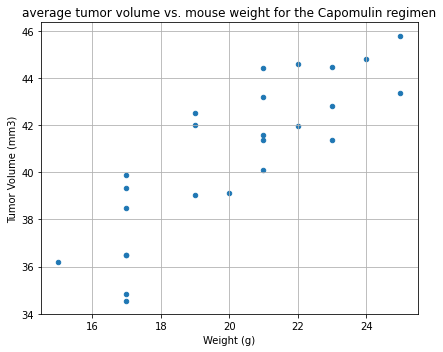

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df=regimen_group.get_group("Capomulin")
plot_data=Capomulin_df.groupby("Mouse ID").agg({"Weight (g)":"first","Tumor Volume (mm3)":"mean"})

vol_vs_weight_plot=plot_data.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)",figsize=(6,5),grid="True")
vol_vs_weight_plot.set_title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.tight_layout()
plt.show()

## Correlation and Regression

correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84


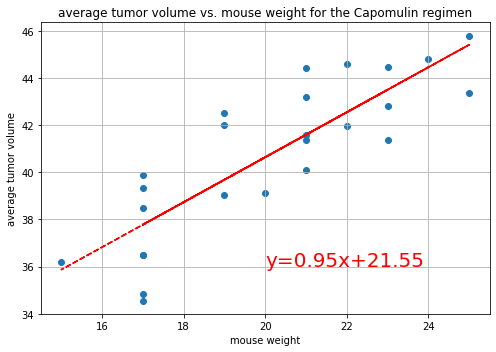

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr_coeff=sts.pearsonr(plot_data["Weight (g)"],plot_data["Tumor Volume (mm3)"])
print(f"correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(corr_coeff[0],2)}")

#regression line plot 
x_value=plot_data["Weight (g)"]
y_value=plot_data["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_value,y_value)
regress_values = slope * x_value + intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.figure(figsize=(7,5))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r--")
plt.annotate(line_eq,(20,36),fontsize=20,color="red")

plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("mouse weight")
plt.ylabel("average tumor volume")
plt.grid(True)
plt.tight_layout()
plt.show()